In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import jaccard_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report

import seaborn as sns
import matplotlib.pyplot as plt

<h1 style="padding:30px; color: green; background-color:gray; display:inline-block">Diagnosis of diabetes.</h1>

The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. 

**The goal** is to predict whether a patient has diabetes based on diagnostic measurements.

In [2]:
URL = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(URL)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Content
All patients in the dataset are women at least 21 years old.

Columns:
*  Pregnancies: the number of pregnancies
* Glucose: Glucose test result
* BloodPressure: diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-hour serum insulin (mu U/ml)
* BMI: Body Mass Index (weight in kg / (height in m) ^ 2)
* DiabetesPedigreeFunction: Diabetes Pedigree Function
* Age: Age (years)
* Outcome: Class (0 - no diabetes, 1 - diabetes)

The dataset included information on the presence or absence of diabetes. And the **Outcome** column represents diabetes *(1)* or no diabetes *(0)*.

In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

So we have **268 patients** with *diabetes* and **500** without *it*. To ensure balance, we will exclude **268 non-diabetic** subjects.

In [4]:
df0 = df[df['Outcome'] == 0].sample(268)
df1 = df[df['Outcome'] == 1]
df_norm = pd.concat([df1, df0], axis=0)
df_norm['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

<h1 style="padding:30px; color: black; background-color:green; display:inline-block">Correlation.</h1>

In [5]:
corr_matrix = df_norm.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.093039,0.168097,0.047530,0.057097,0.000929,0.032144,0.544609,0.202056
Glucose,0.093039,1.000000,0.160912,0.083365,0.329625,0.232418,0.118010,0.254244,0.457302
BloodPressure,0.168097,0.160912,1.000000,0.218637,0.092753,0.271864,0.079467,0.290721,0.090455
SkinThickness,0.047530,0.083365,0.218637,1.000000,0.448532,0.398029,0.218336,0.073993,0.064986
Insulin,0.057097,0.329625,0.092753,0.448532,1.000000,0.165188,0.140490,0.016508,0.125579
BMI,0.000929,0.232418,0.271864,0.398029,0.165188,1.000000,0.143508,0.021010,0.294983
DiabetesPedigreeFunction,0.032144,0.118010,0.079467,0.218336,0.140490,0.143508,1.000000,0.004876,0.162036
Age,0.544609,0.254244,0.290721,0.073993,0.016508,0.021010,0.004876,1.000000,0.249283
Outcome,0.202056,0.457302,0.090455,0.064986,0.125579,0.294983,0.162036,0.249283,1.000000


In [6]:
df_norm["Pregnancies/Age"] = df_norm["Pregnancies"] / df_norm["Age"]
df_norm["Blood/Age"] = df_norm["BloodPressure"] / df_norm["Age"]
df_norm["Glucose/Age"] = df_norm["Glucose"] / df_norm["Age"]

In [7]:
df_norm.corrwith(df_norm['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.457302
BMI                         0.294983
Age                         0.249283
Pregnancies                 0.202056
DiabetesPedigreeFunction    0.162036
Blood/Age                   0.161360
Pregnancies/Age             0.143879
Insulin                     0.125579
Glucose/Age                 0.093819
BloodPressure               0.090455
SkinThickness               0.064986
dtype: float64

<h1 style="padding:30px; color: black; background-color:green; display:inline-block">Machine Learning.</h1>

In [8]:
X = df_norm.drop('Outcome', axis=1).values
y = df_norm['Outcome']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [10]:
y_predict = knn.predict(X_test)

<h1 style="padding:30px; color: black; background-color:green; display:inline-block">Evaluation.</h1>
<h3>Jaccard index</h3>

In [11]:
jaccard_score(y_test, y_predict)

0.5873015873015873

<h3>Confusion matrix</h3>

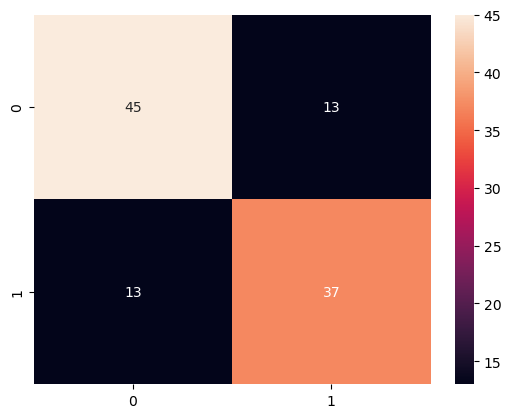

In [12]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [13]:
confusion_matrix(y_test, y_predict)

array([[45, 13],
       [13, 37]])

Precision, recall, F1

In [14]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        58
           1       0.74      0.74      0.74        50

    accuracy                           0.76       108
   macro avg       0.76      0.76      0.76       108
weighted avg       0.76      0.76      0.76       108



We check using cross-validation

In [15]:
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       268
           1       0.70      0.70      0.70       268

    accuracy                           0.70       536
   macro avg       0.70      0.70      0.70       536
weighted avg       0.70      0.70      0.70       536



Finding the best k

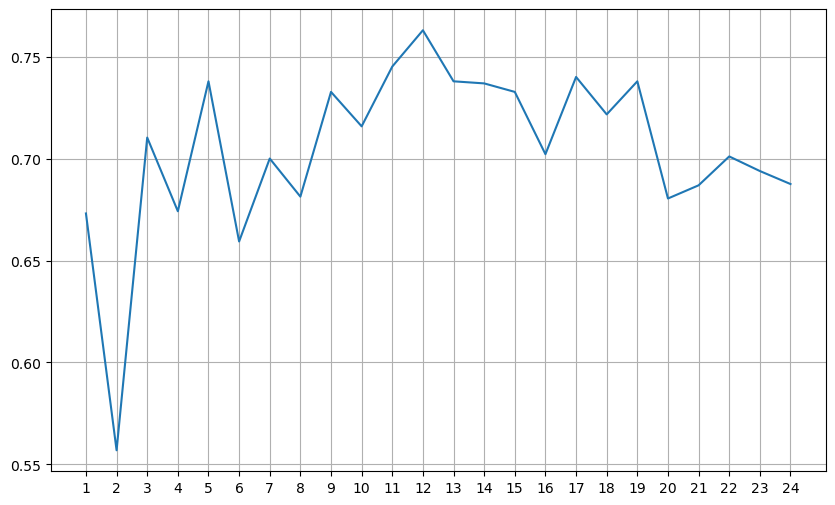

In [16]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

Grid Search

In [17]:
param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [18]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23,  6, 20, 21, 22, 18, 15,  1,  4,  5, 10,  7,  9,  8, 14, 13,
        2,  3, 17, 11, 12, 16, 19], dtype=int32)

In [19]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [20]:
knn_gscv.best_score_

0.7164935964001384

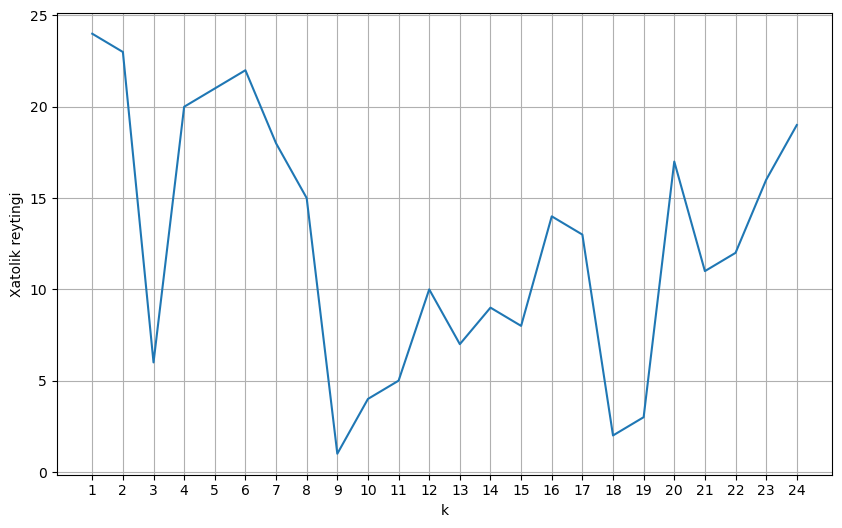

In [21]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()